In [2]:
# Loading the necessary libraries
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)


person_age 	Age of the person 	Float
person_gender 	Gender of the person 	Categorical
person_education 	Highest education level 	Categorical
person_income 	Annual income 	Float
person_emp_exp 	Years of employment experience 	Integer
person_home_ownership 	Home ownership status (e.g., rent, own, mortgage) 	Categorical
loan_amnt 	Loan amount requested 	Float
loan_intent 	Purpose of the loan 	Categorical
loan_int_rate 	Loan interest rate 	Float
loan_percent_income 	Loan amount as a percentage of annual income 	Float
cb_person_cred_hist_length 	Length of credit history in years 	Float
credit_score 	Credit score of the person 	Integer
previous_loan_defaults_on_file 	Indicator of previous loan defaults 	Categorical
loan_status (target variable) 	Loan approval status: 1 = approved; 0 = rejected 	Integer

In [ ]:
data <- read.csv("loan_data.csv")
head(data)
summary(data)

In [ ]:
data[, "person_gender"] <- as.factor(data[, "person_gender"])
data[, "person_education"] <- as.factor(data[, "person_education"])
data[, "person_home_ownership"] <- as.factor(data[, "person_home_ownership"])
data[, "loan_intent"] <- as.factor(data[, "loan_intent"])
data[, "previous_loan_defaults_on_file"] <- as.factor(data[, "previous_loan_defaults_on_file"])
data[, "loan_status"] <- as.factor(data[, "loan_status"])

In [ ]:
summary(data)

[1] 0

person_age                  person_gender 
                             0                              0 
              person_education                  person_income 
                             0                              0 
                person_emp_exp          person_home_ownership 
                             0                              0 
                     loan_amnt                    loan_intent 
                             0                              0 
                 loan_int_rate            loan_percent_income 
                             0                              0 
    cb_person_cred_hist_length                   credit_score 
                             0                              0 
previous_loan_defaults_on_file                    loan_status 
                             0                              0

[1] 0

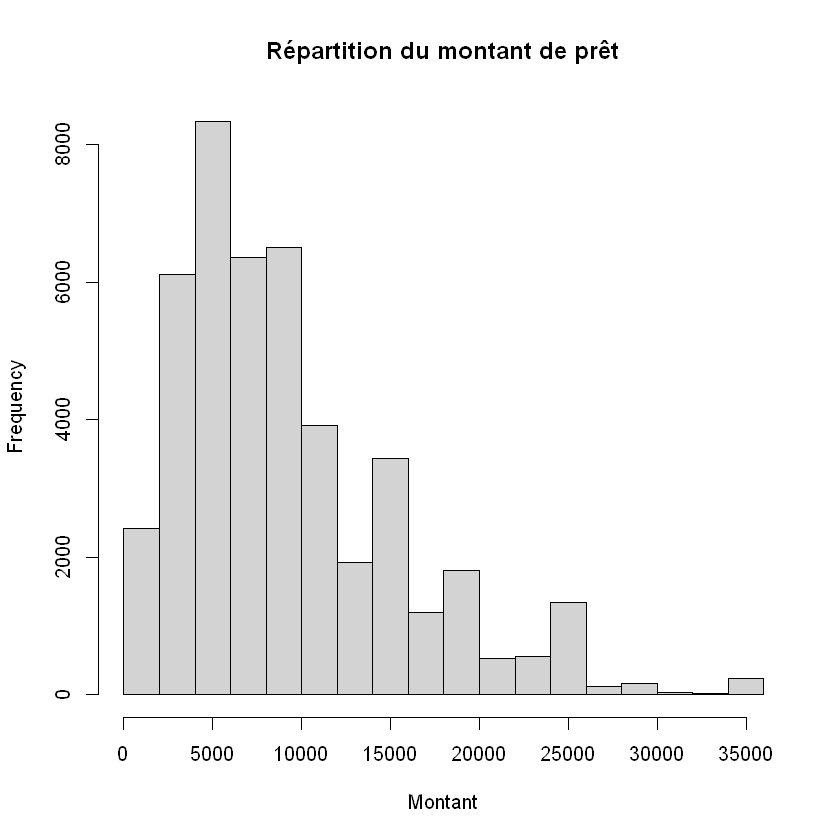

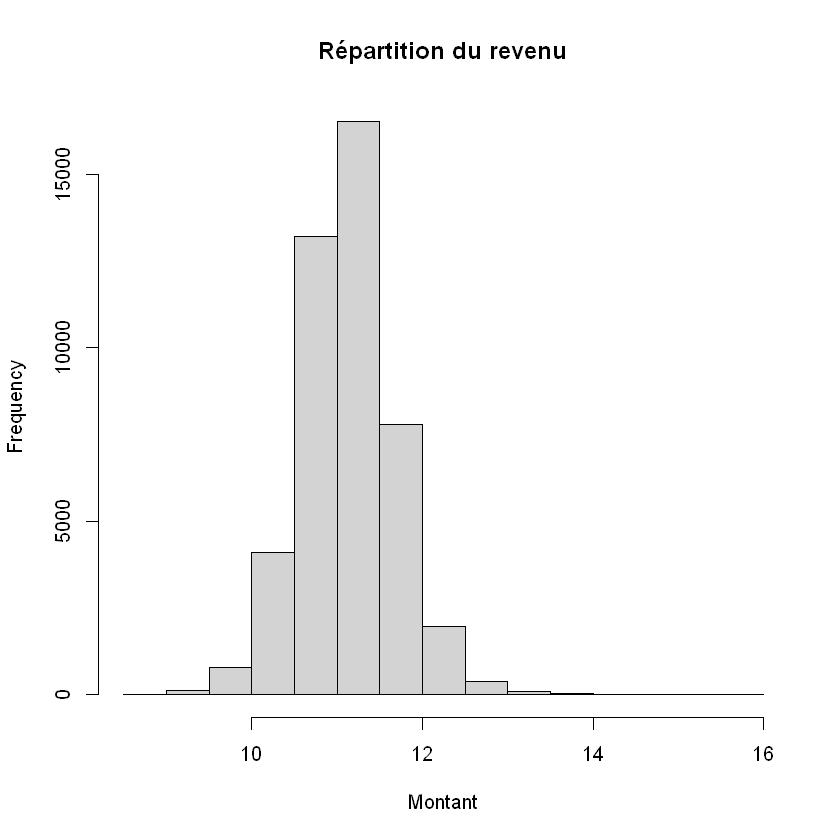

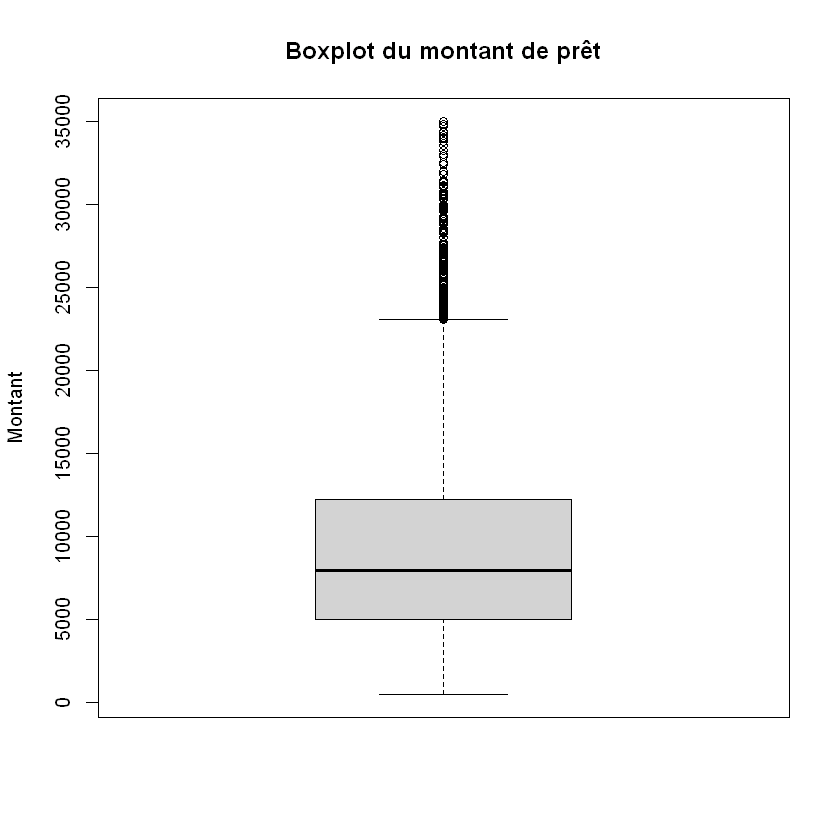

person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>


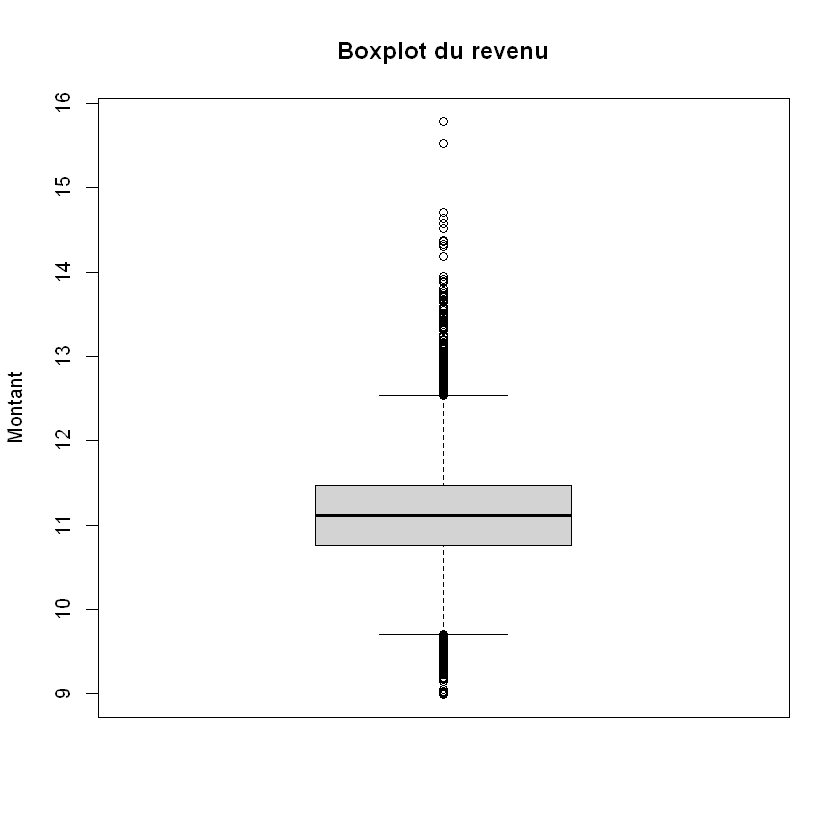

In [2]:
sum(is.na(data))  # Đếm tổng số giá trị NA trong toàn bộ dataframe
colSums(is.na(data))
# Nombre de lignes en double
sum(duplicated(data))
# Histogramme d'une variable numérique
hist(data$loan_amnt, main = "Répartition du montant de prêt", xlab = "Montant")
hist(data$person_income, main = "Répartition du revenu", xlab = "Montant")

# Boîte à moustaches (boxplot) d'une variable numérique
boxplot(data$loan_amnt, main = "Boxplot du montant de prêt", ylab = "Montant")
boxplot(data$person_income, main = "Boxplot du revenu", ylab = "Montant")

data_plus_de_100 <- data[data$person_age > 100, ]
data_plus_de_100

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


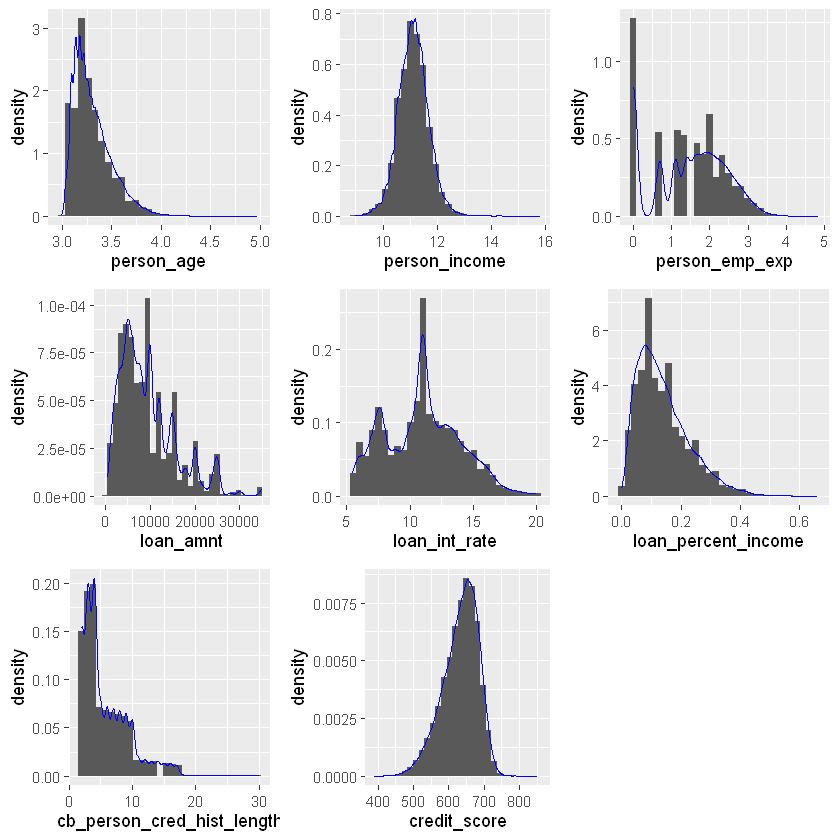

In [3]:
g1<-ggplot(data,aes(x=person_age))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(data,aes(x=person_income))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(data,aes(x=person_emp_exp))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(data,aes(x=loan_amnt))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(data,aes(x=loan_int_rate))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(data,aes(x=loan_percent_income))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(data,aes(x=cb_person_cred_hist_length))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(data,aes(x=credit_score))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 


grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,ncol=3)
rm(g1,g2,g3,g4,g5,g6,g7,g8)

In [4]:
data[, "person_age"] <- log(data[, "person_age"])
data[, "person_income"] <- log(data[, "person_income"])
data[, "person_emp_exp"] <- log1p(data[, "person_emp_exp"])

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."
corrplot 0.95 loaded



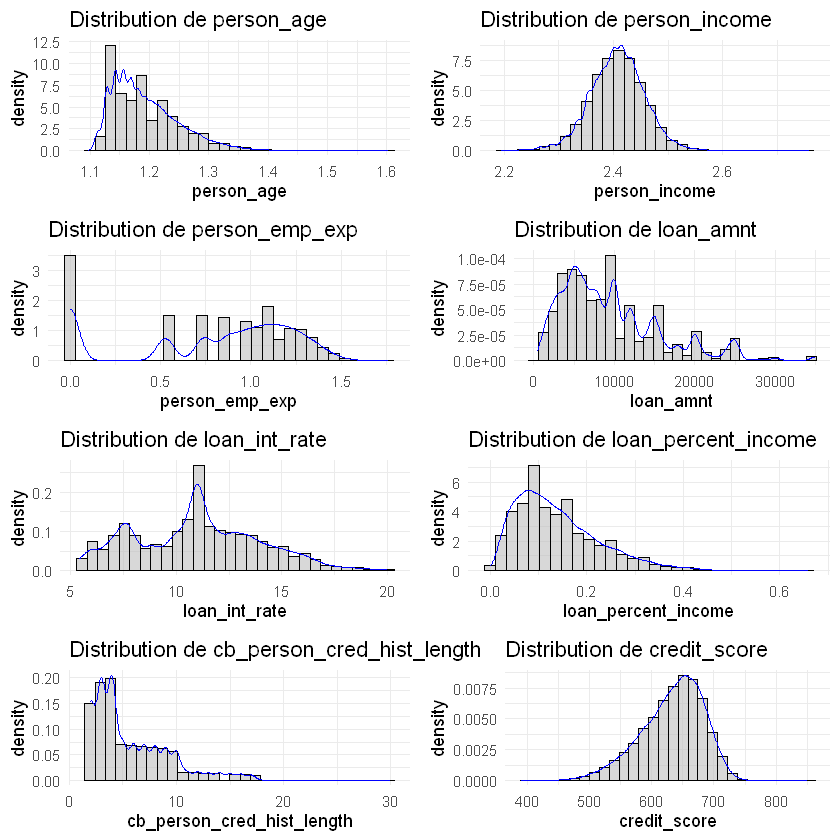

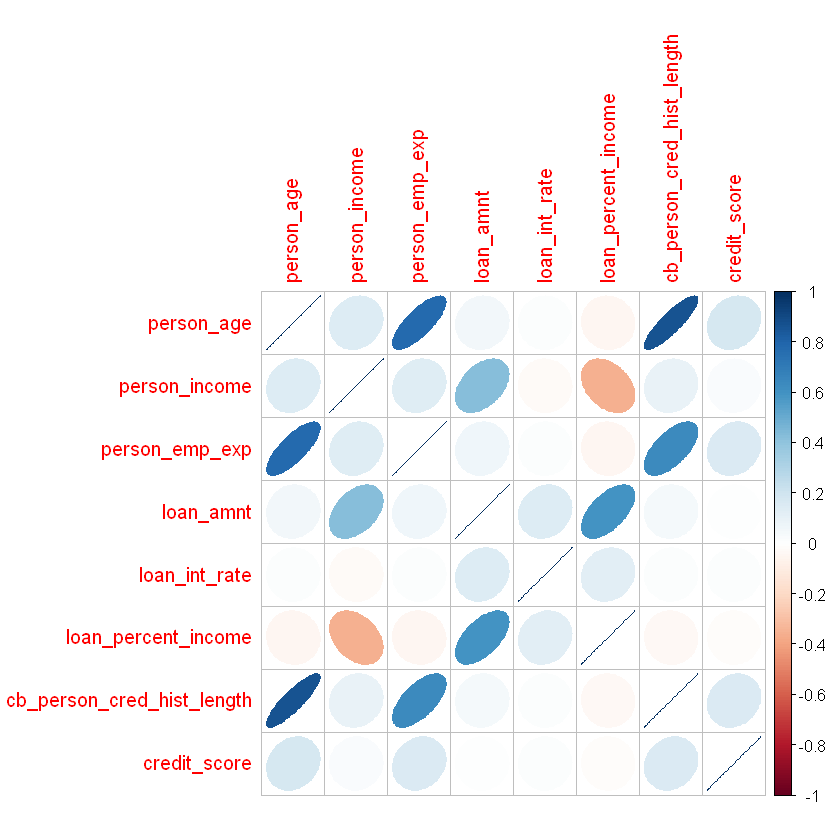

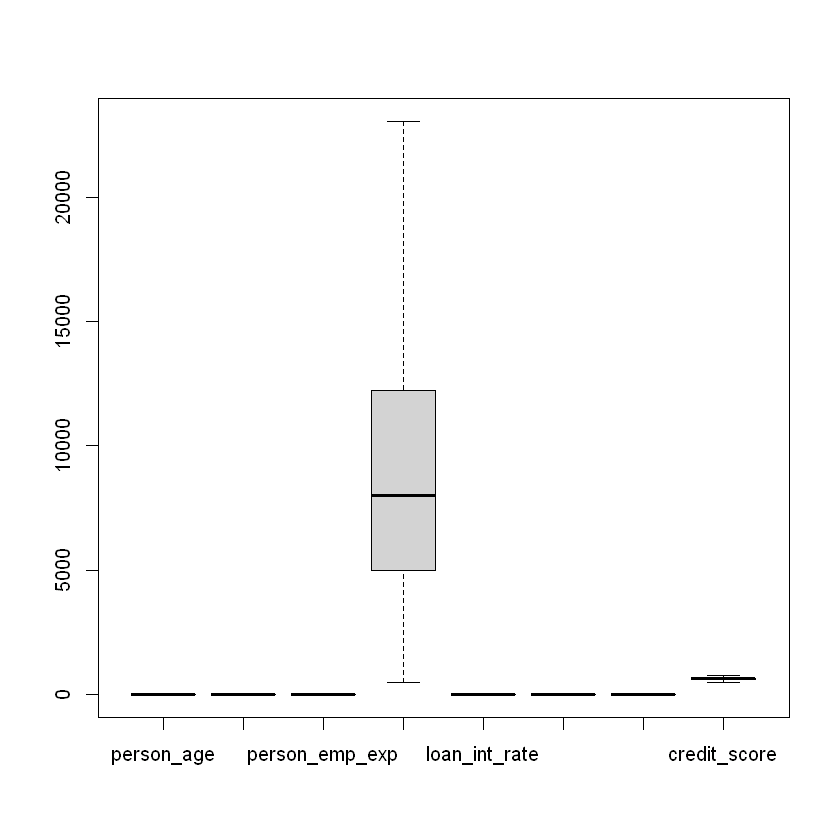

In [5]:
library(ggplot2)
library(purrr)

# Sélectionner uniquement les colonnes numériques
numeric_vars <- names(data)[sapply(data, is.numeric)]

# Générer et afficher les graphiques pour chaque variable numérique
plots <- map(numeric_vars, function(var) {
  ggplot(data, aes_string(x = var)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "grey", color = "black", alpha = 0.6) +
    geom_density(alpha = 0.5, color = "blue") +
    ggtitle(paste("Distribution de", var)) +
    theme_minimal()
})

# Afficher les graphiques (si RStudio, utilisez gridExtra pour les afficher ensemble)
library(gridExtra)
do.call(grid.arrange, c(plots, ncol = 2))
library(corrplot)
corrplot(cor(data[,c(1,4,5,7,9,10,11,12)]),method="ellipse")
boxplot(data[,c(1,4,5,7,9,10,11,12)],outline = FALSE)
#ggpairs(data[,c(1,4,5,7,9,10,11,12)])

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,2.61923779,32.7404724,32.74047
comp 2,1.65126337,20.6407921,53.38126
comp 3,1.28477692,16.0597115,69.44098
comp 4,0.95326795,11.9158493,81.35683
comp 5,0.93862711,11.7328389,93.08966
comp 6,0.37355603,4.6694504,97.75911
comp 7,0.10485435,1.3106794,99.06979
comp 8,0.07441647,0.9302059,100.00000


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




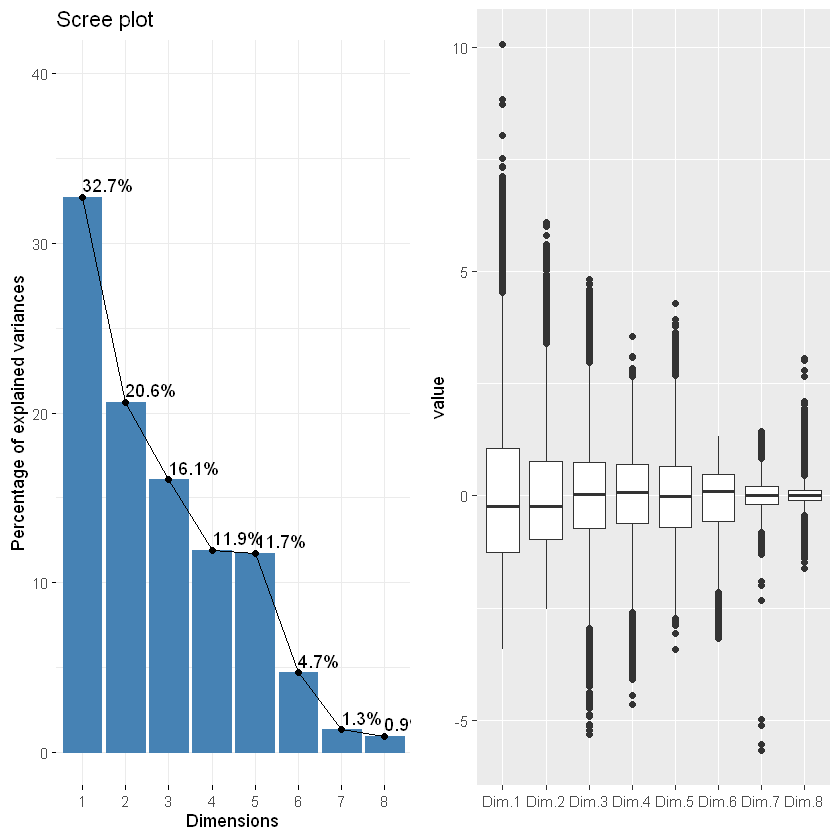

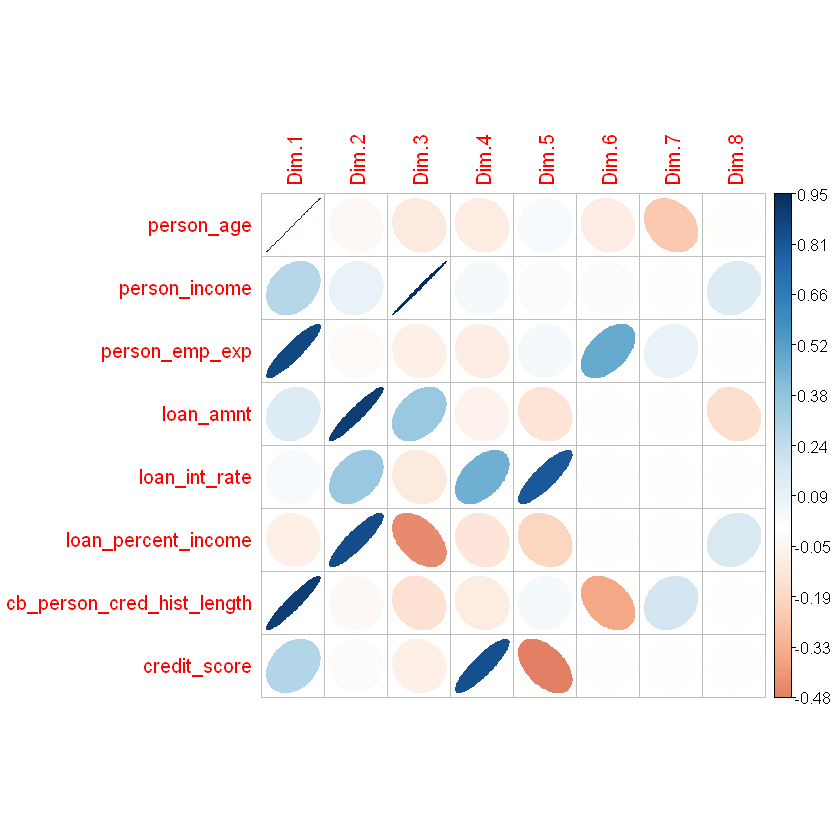

In [6]:
library(FactoMineR)
data_quanti = data[,c(1,4,5,7,9,10,11,12)]
data_quali = data[,-c(1,4,5,7,9,10,11,12)]
acp <- PCA(data_quanti, scale.unit = TRUE,
           graph = FALSE,  ncp = 8)
# Eigenvalue decay
acp$eig
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)
# 
library(corrplot)
corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

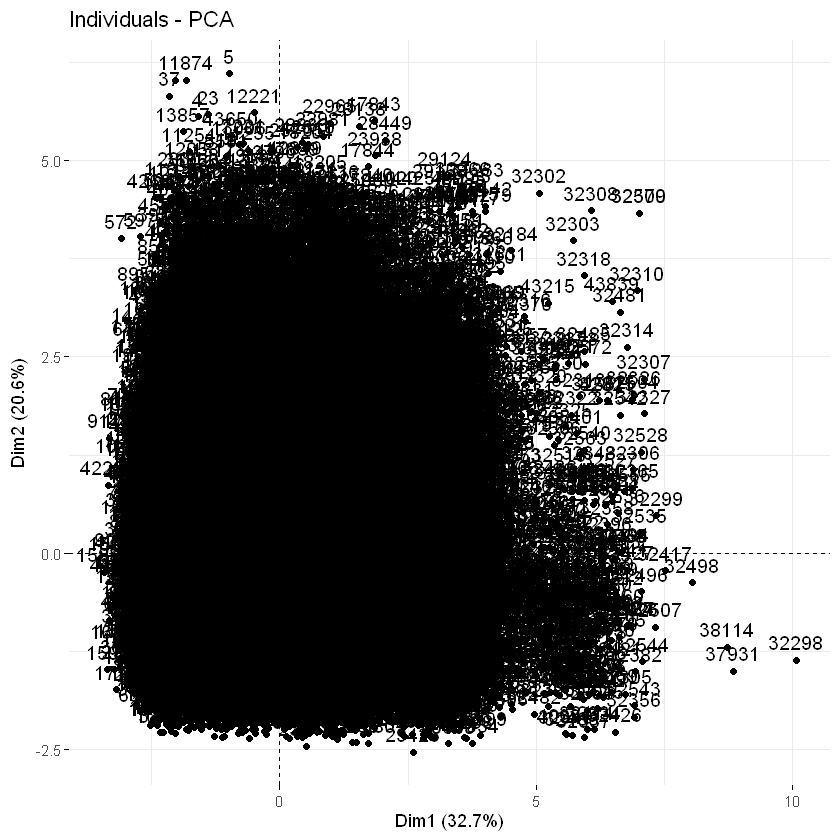

In [7]:
#fviz_pca_ind(acp,col.ind="contrib",label="none")
fviz_pca_ind(acp)
#fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
#fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))
#fviz_pca_ind(acp, label="none", habillage=2)

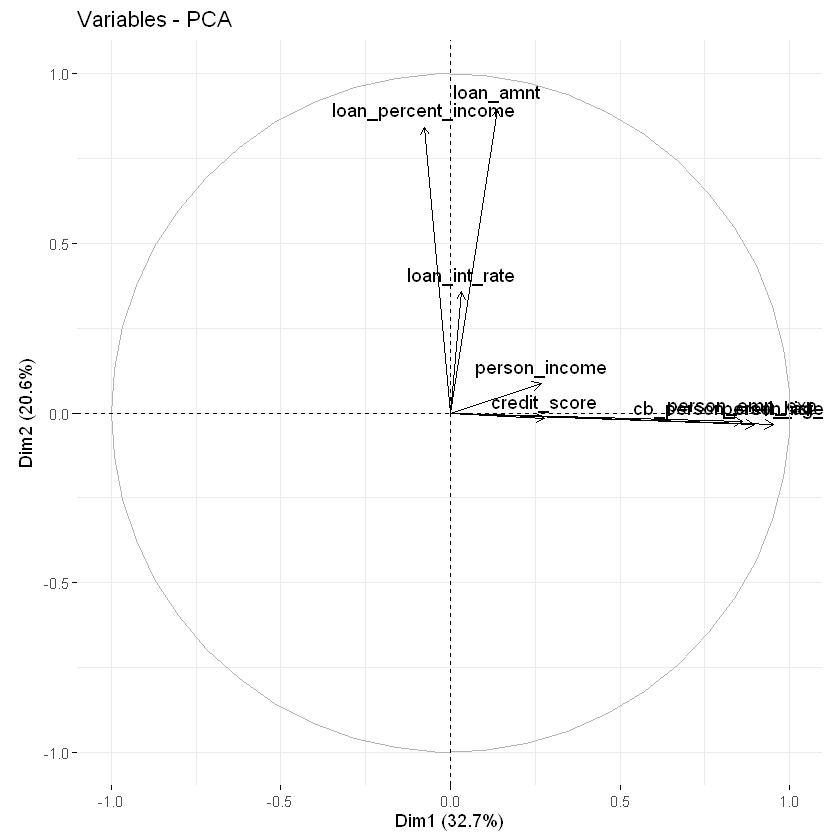

In [8]:
fviz_pca_var(acp)
#fviz_pca_var(acp,axes =c(1,3))
#fviz_pca_var(acp,axes =c(2,3))
#fviz_pca_var(acp,axes =c(1,4))
#fviz_pca_var(acp,axes =c(2,4))
#fviz_pca_var(acp,axes =c(3,4))

Dim1: person_age, person_emp_exp, cb_person_cred_hist_length 
Dim2: loan_amnt, loan_percent_income 
Dim3: person_income 
Dim4: credit score

# MCA

In [9]:
data_quali

person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,loan_status
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
female,Master,RENT,PERSONAL,No,1
female,High School,OWN,EDUCATION,Yes,0
female,High School,MORTGAGE,MEDICAL,No,1
female,Bachelor,RENT,MEDICAL,No,1
male,Master,RENT,MEDICAL,No,1
female,High School,OWN,VENTURE,No,1
female,Bachelor,RENT,EDUCATION,No,1
female,High School,RENT,MEDICAL,No,1
female,Associate,RENT,PERSONAL,No,1


In [10]:
data_quanti

person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1.128508,2.414457,0.0000000,35000,16.02,0.49,3,561
1.113344,2.242399,0.0000000,1000,11.14,0.08,2,504
1.169032,2.243738,0.8697417,5500,12.87,0.44,3,635
1.142787,2.423624,0.0000000,35000,15.23,0.44,2,675
1.156269,2.406896,0.5265890,35000,14.27,0.53,4,586
1.113344,2.248016,0.0000000,2500,7.14,0.19,2,532
1.181143,2.437588,0.5265890,35000,12.42,0.37,3,701
1.156269,2.439509,1.0266720,35000,11.11,0.37,4,585
1.156269,2.444062,0.8697417,35000,8.90,0.35,2,544


# Etude des variable qualitatives

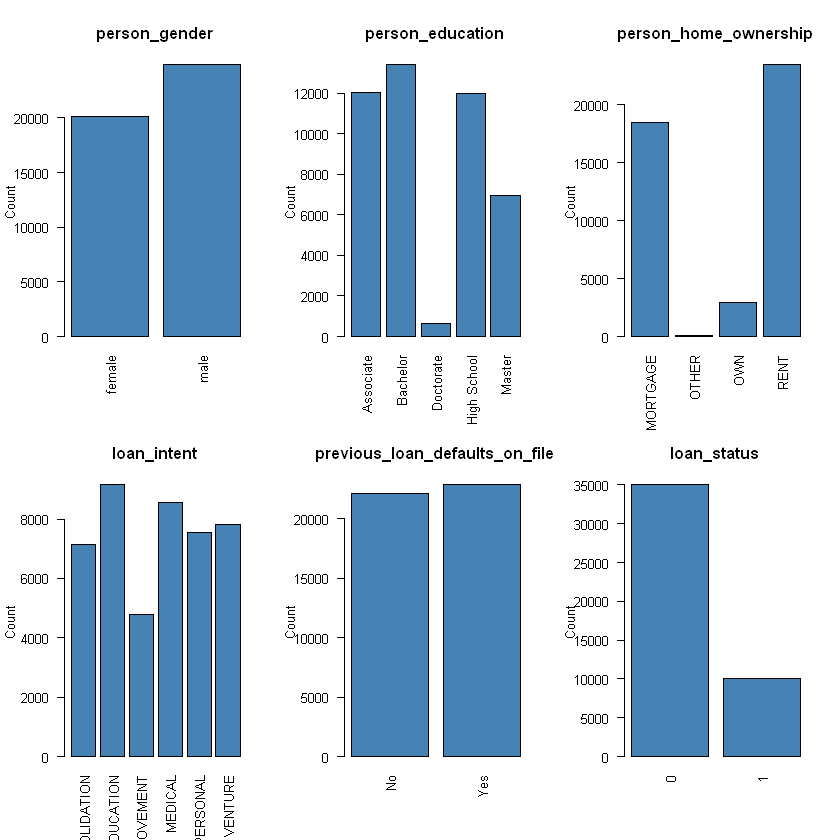

In [11]:
par(mfrow=c(2,3))
I = 6
for (i in 1:I) {
    plot(data_quali[,i], main = colnames(data_quali)[i],
         ylab = "Count", col="steelblue", las = 2)
    }


In [69]:
#help(MCA)

In [70]:
res.mca = MCA(data_quali,quali.sup = 6,graph = FALSE)
res.mca

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 45000 individuals, described by 6 variables
*The results are available in the following objects:

   name                description                                          
1  "$eig"              "eigenvalues"                                        
2  "$var"              "results for the variables"                          
3  "$var$coord"        "coord. of the categories"                           
4  "$var$cos2"         "cos2 for the categories"                            
5  "$var$contrib"      "contributions of the categories"                    
6  "$var$v.test"       "v-test for the categories"                          
7  "$var$eta2"         "coord. of variables"                                
8  "$ind"              "results for the individuals"                        
9  "$ind$coord"        "coord. for the individuals"                         
10 "$ind$cos2"         "cos2 for the individ

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.2422375,8.651340,8.65134
dim 2,0.2177844,7.778013,16.42935
dim 3,0.2091888,7.471030,23.90038
dim 4,0.2035655,7.270196,31.17058
dim 5,0.2013145,7.189803,38.36038
dim 6,0.2010088,7.178884,45.53927
dim 7,0.2004149,7.157676,52.69694
dim 8,0.1989421,7.105075,59.80202
dim 9,0.1981494,7.076766,66.87878
dim 10,0.1975614,7.055766,73.93455


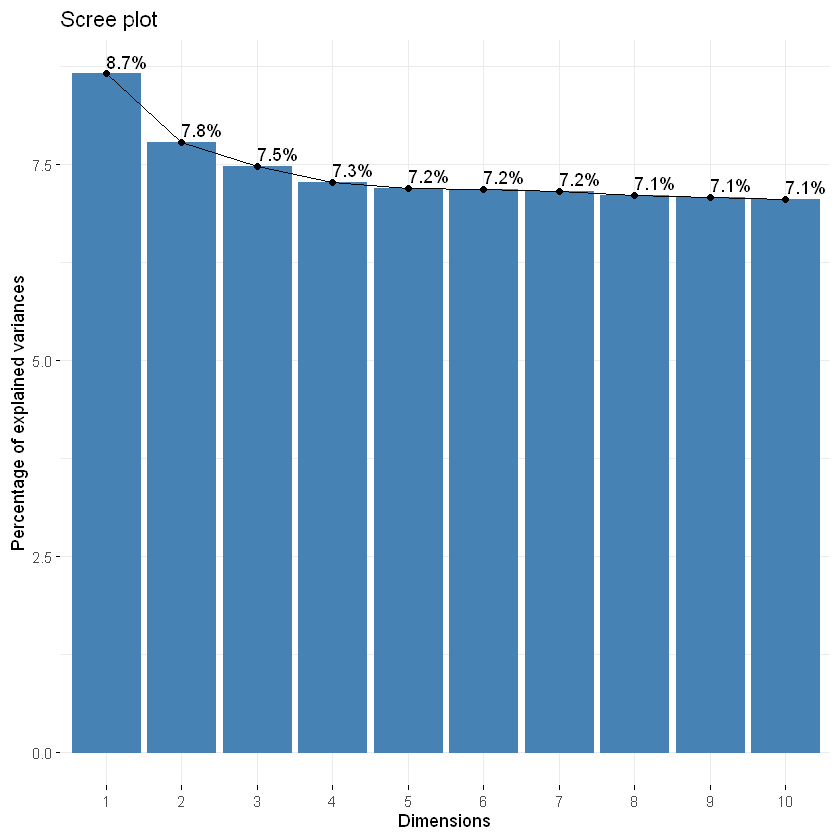

In [71]:
res.mca$eig #K-p = 21-6 = 15
fviz_screeplot(res.mca, addlabels=TRUE) 

In [72]:
1/6

[1] 0.1666667

On garde 7 dims

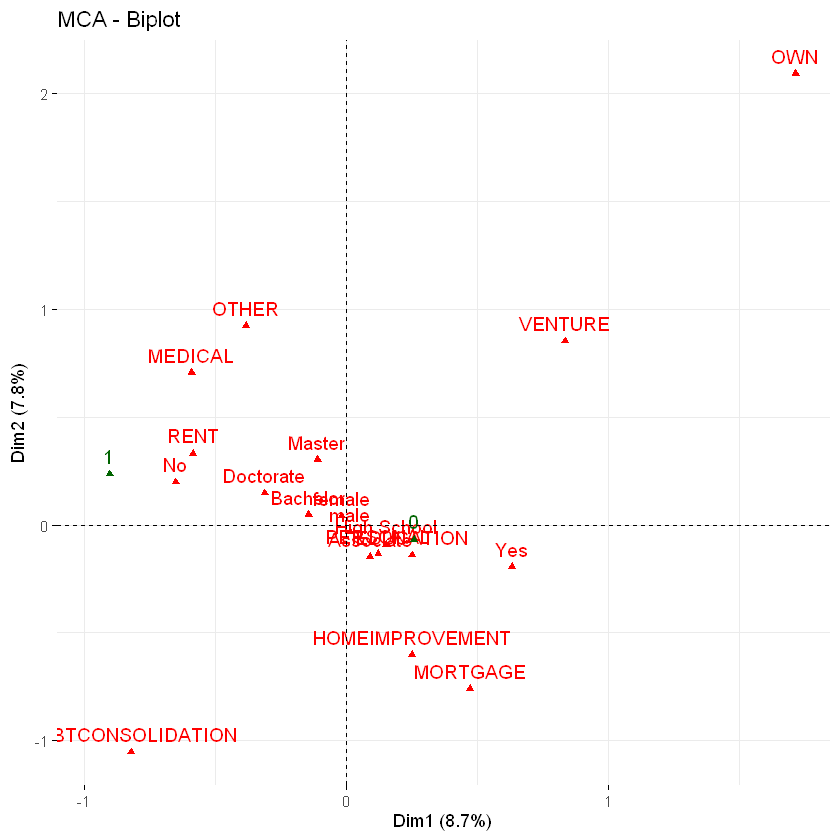

In [74]:
fviz_mca_biplot(res.mca,invisible="ind")

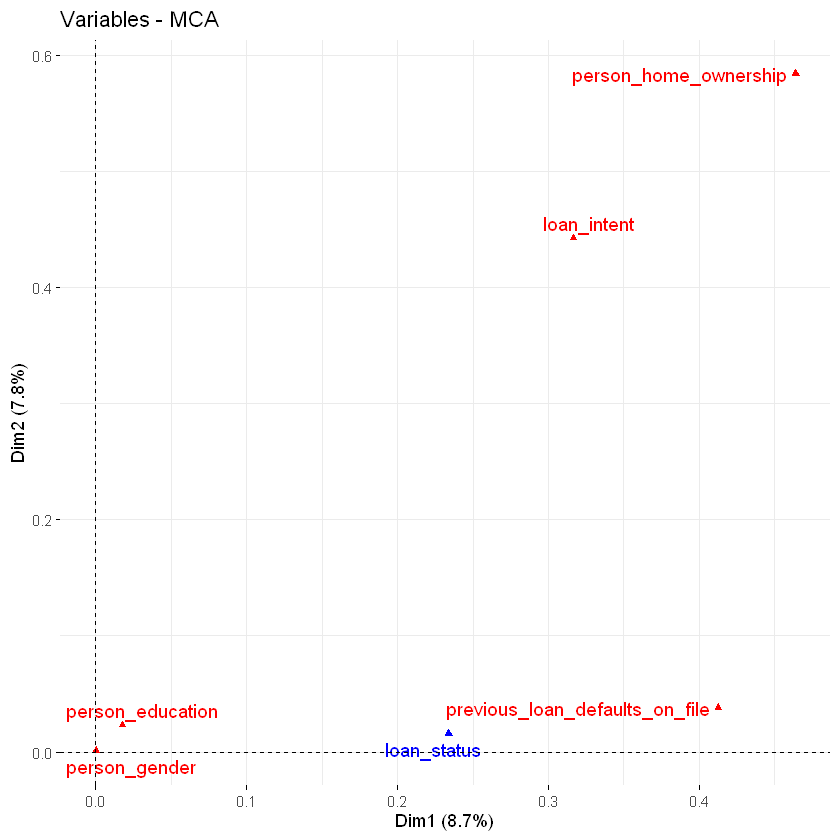

In [75]:
fviz_mca_var(res.mca, choice = "mca.cor",repel = TRUE)

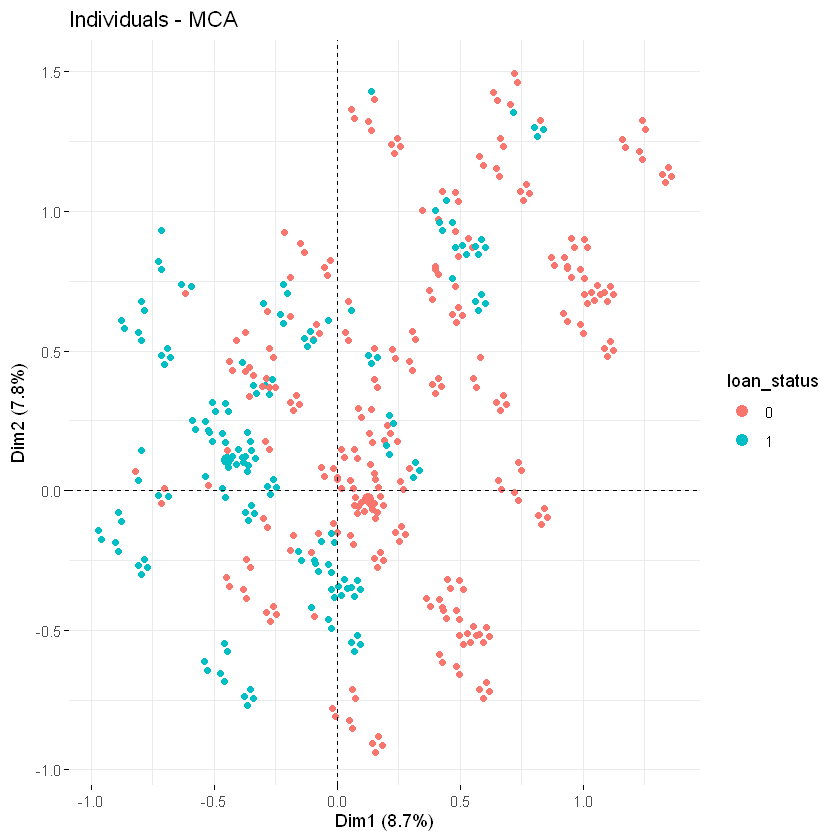

In [76]:
fviz_mca_ind(res.mca, label = "none", habillage = "loan_status")

# MFA


In [18]:
help(MFA)

MFA {FactoMineR},R Documentation
base,a data frame with n rows (individuals) and p columns (variables)
group,a vector with the number of variables in each group
type,"the type of variables in each group; four possibilities: ""c"" or ""s"" for quantitative variables (the difference is that for ""s"" variables are scaled to unit variance), ""n"" for categorical variables ""m"" for group of mixed variables and ""f"" for frequencies (from a contingency tables); by default, all variables are quantitative and scaled to unit variance"
excl,"an argument that may possible to exclude categories of active variables of categorical variable groups. NULL by default, it is a list with indexes of categories that are excluded per group"
ind.sup,a vector indicating the indexes of the supplementary individuals
ncp,number of dimensions kept in the results (by default 5)
name.group,"a vector containing the name of the groups (by default, NULL and the group are named group.1, group.2 and so on)"
num.group.sup,"the indexes of the illustrative groups (by default, NULL and no group are illustrative)"
graph,"boolean, if TRUE a graph is displayed"
weight.col.mfa,"vector of weights, useful for HMFA method (by default, NULL and an MFA is performed)"


In [24]:
data_mfa <- data.frame(data_quanti, data_quali[,-6])
res.mfa <- MFA(
  data_mfa,
  group = c(8, 5),     # Nombre de variables par groupe
  type = c("s", "n"),# "s" = quanti, "n" = quali
  name.group = c("Group_quanti", "Group_quali"),  # noms des groupes
  graph = FALSE
)

In [26]:
summary(res.mfa)


Call:
MFA(base = data_mfa, group = c(8, 5), type = c("s", "n"), name.group = c("Group_quanti",  
     "Group_quali"), graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               1.144   1.087   0.936   0.864   0.842   0.837   0.828
% of var.              7.827   7.437   6.405   5.910   5.759   5.727   5.667
Cumulative % of var.   7.827  15.264  21.669  27.579  33.338  39.064  44.732
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.824   0.821   0.818   0.812   0.806   0.744   0.736
% of var.              5.638   5.618   5.599   5.555   5.516   5.090   5.034
Cumulative % of var.  50.369  55.987  61.587  67.142  72.658  77.747  82.781
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.719   0.568   0.380   0.332   0.307   0.141   0.040
% of var.              4.924   3.888   2.602   2.270   2.101   0.968   0.273
Cumu

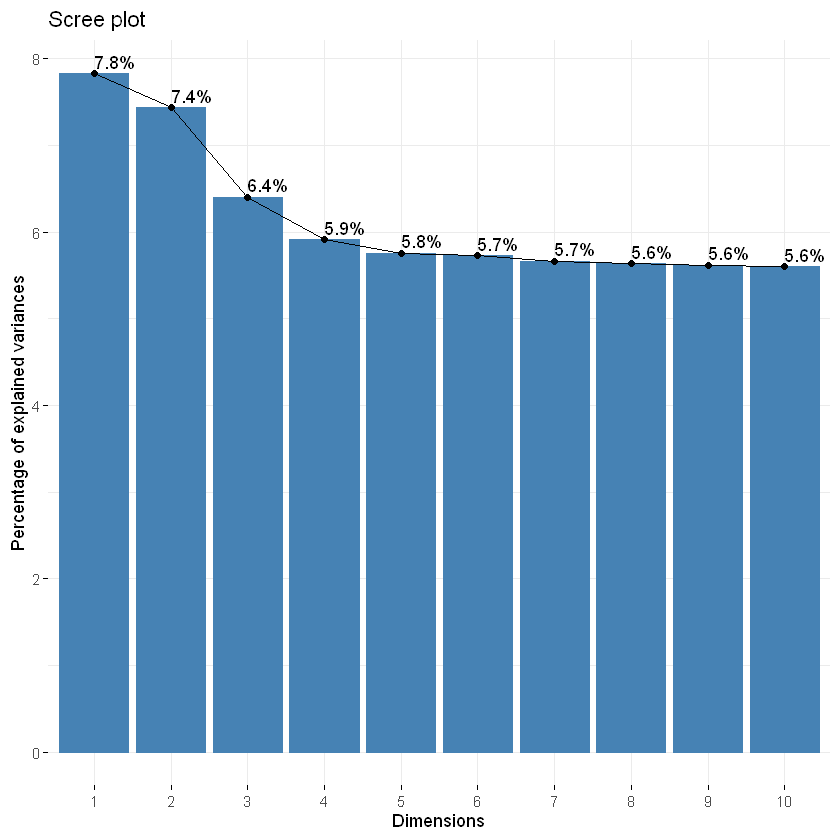

In [27]:
fviz_screeplot(res.mfa, addlabels = TRUE)

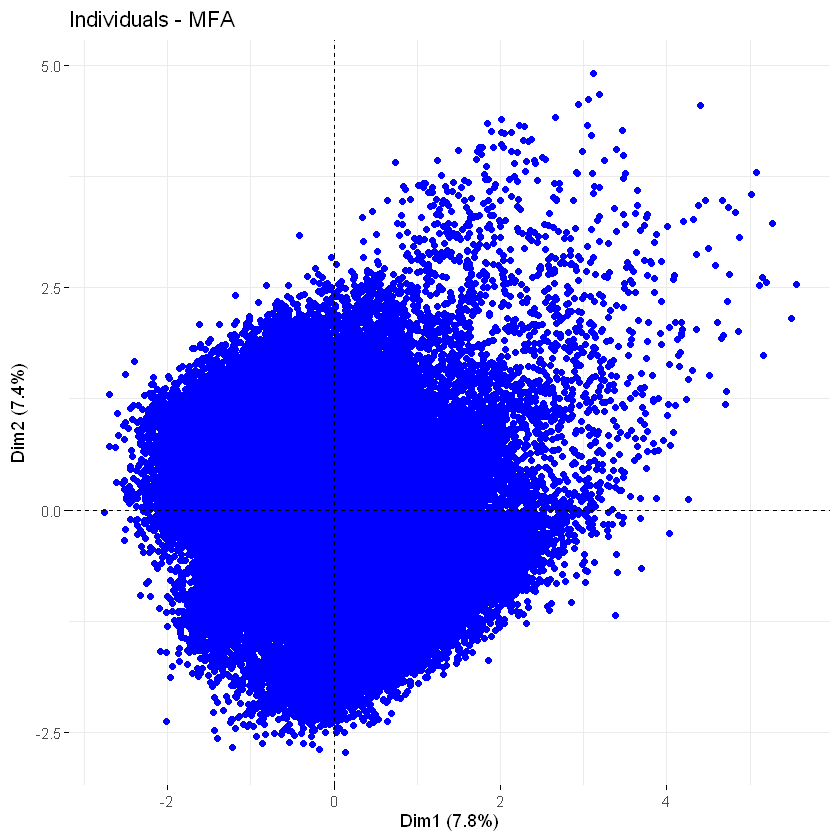

In [28]:
#fviz_mfa_ind(res.mfa, label = "none")
fviz_mfa_ind(res.mfa, label = "none", repel = TRUE)

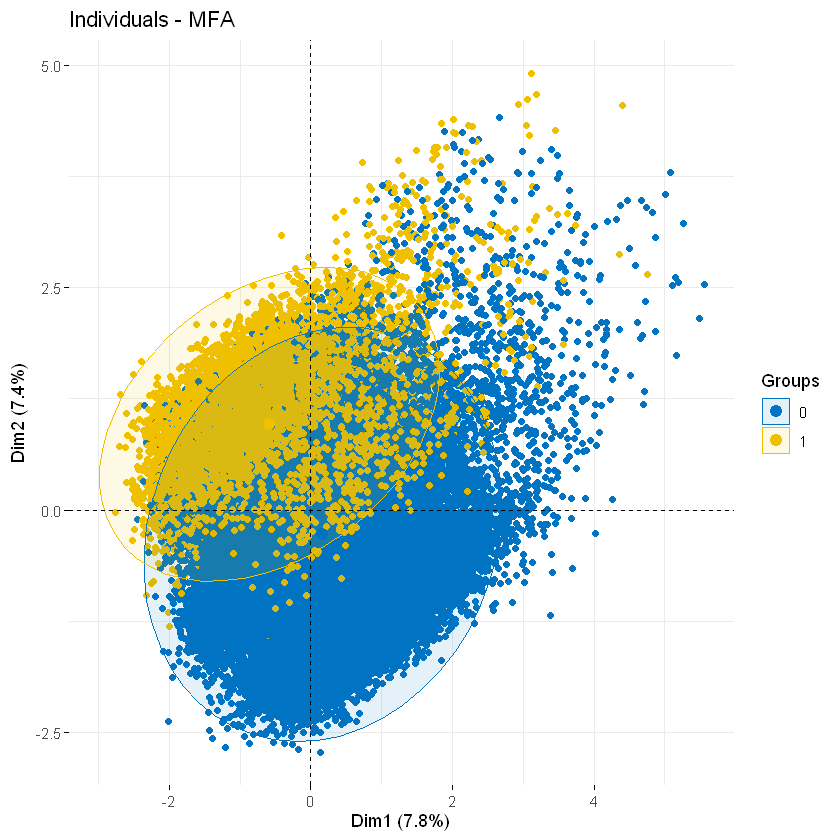

In [29]:
fviz_mfa_ind(res.mfa,
             label = "none",
             habillage = data_quali$loan_status,
             addEllipses = TRUE,
             palette = "jco")

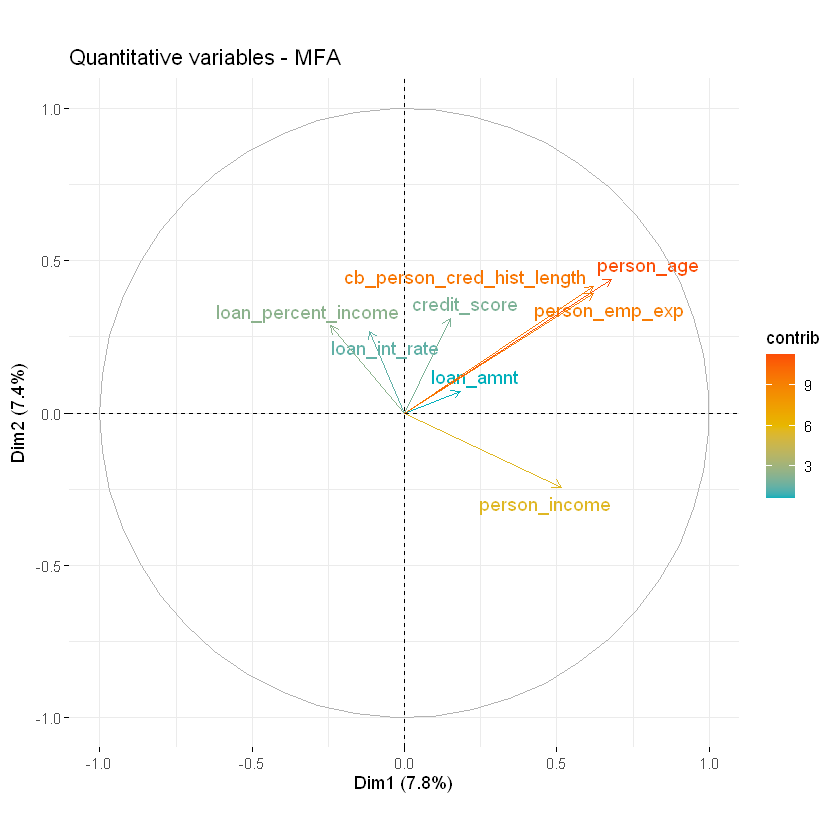

In [30]:
fviz_mfa_var(res.mfa, "quanti.var", repel = TRUE,
             col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"))

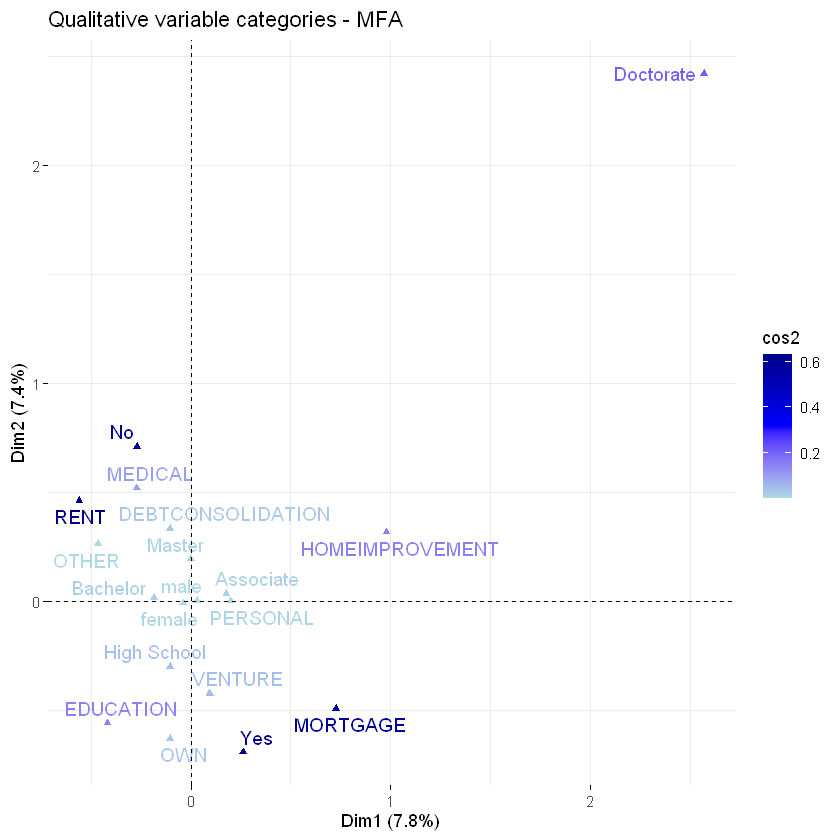

In [31]:
fviz_mfa_var(res.mfa, "quali.var", repel = TRUE,
             col.var = "cos2", gradient.cols = c("lightblue", "blue", "darkblue"))

In [32]:
coords <- res.mfa$ind$coord

In [36]:
set.seed(123)
km_res <- kmeans(coords, centers = 2, nstart = 25)

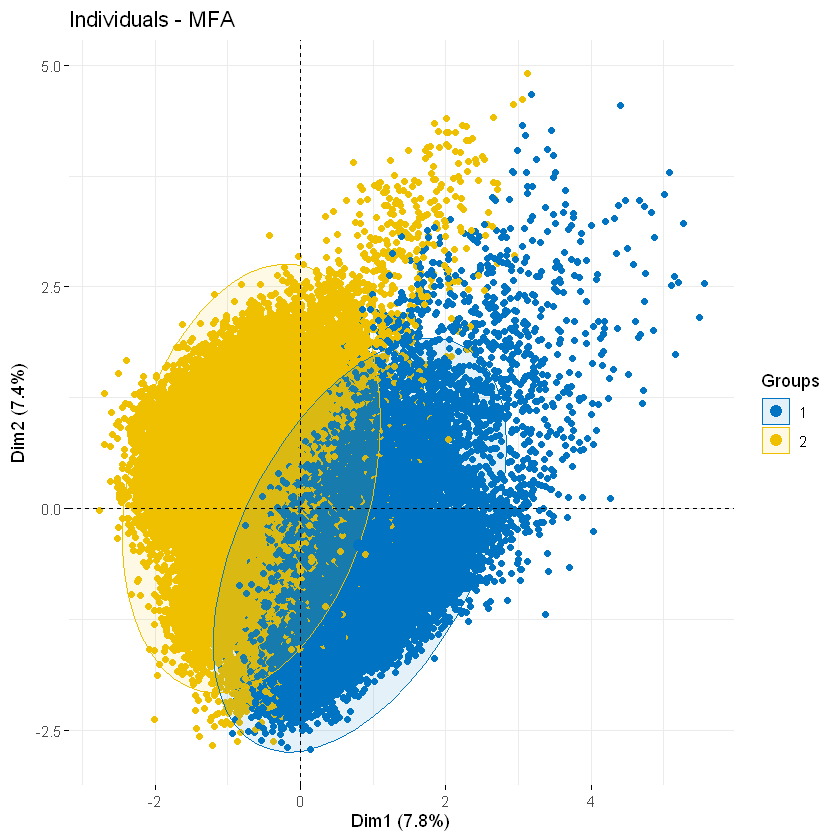

In [38]:
fviz_mfa_ind(res.mfa,
             habillage = as.factor(km_res$cluster),
             palette = "jco",
             addEllipses = TRUE,
             label = "none")

In [60]:
table(as.factor(km_res$cluster), data_quali$loan_status)

   
        0     1
  1 18653  1628
  2 16347  8372